1. 다음의 Input Output (논리회로의 XOR gate)을 나타내는 Neural Network 모델을 만들어서 학습시키시오. 
Tranining step이 늘어남에 따라 Loss 함수가 줄어드는 그래프도 그리시오

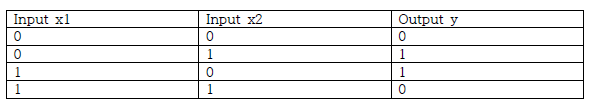


**Line 1-2:** 배열과 그림 그리기를 위한 패키지 import

**Line 4-9:** XOR 게이트의 입력 값 X와 출력 값 Y를 선언하고 신경망 구조에서 사용할 2게의 레이어 가중치와 편차 값을 선언해 준다.

**Line 11-13:** 학습을 위한 변수 선언

**Line 15-16:** XOR 학습에 따른 결과를 활성화하기 위한 sigmoid 활성화 함수 선언

**Line 18-28:** XOR Neural Network의 Feedforward 학습 수행을 진행하는 코드, Input layer의 결과를 두번째 hidden layer의 입력 값으로 사용하여서 hidden layer 학습을 수행한다.

**Line 30-35:** 학습된 결과에 따라서 오차를 줄이기 위해 Backpropagation을 수행하여서 가중치 값과 편차 값을 update 해준다. 

**Line 37:** 학습을 통해 나온 Y값과 실제 Y값의 오차를 반영한 error 값을 저장한다.

**Line 39-42:** 학습 횟수에 따른 error를 보여주기 위한 그래프를 그려준다.


[[ 0.05487053  0.50846113]
 [ 0.30638656 -2.62425957]]
[[-0.05581608 -0.70845025]]
layer_1
[0.90301584 0.1587634 ]
layer_2
[0.46692159]
error
[-0.46692159]
result
[0.46692159]
layer_1
[0.93939223 0.01352607]
layer_2
[0.48671568]
error
[-0.46692159  0.51328432]
result
[0.46692159 0.48671568]
layer_1
[0.90771688 0.20422515]
layer_2
[0.45941217]
error
[-0.46692159  0.51328432  0.54058783]
result
[0.46692159 0.48671568 0.45941217]
layer_1
[0.94234531 0.01822669]
layer_2
[0.49811322]
error
[-0.46692159  0.51328432  0.54058783 -0.49811322]
result
[0.46692159 0.48671568 0.45941217 0.49811322]


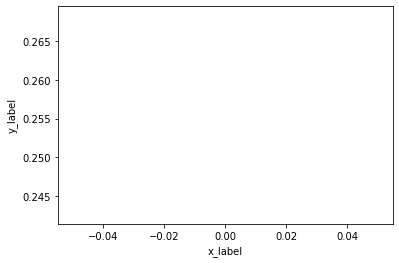

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])
w1 = np.random.randn(2,2)
b1 = np.random.randn(1,2)
w2 = np.random.randn(1,2)
b2 = np.random.randn(1)

learning_rate = 0.1
iteration = 1
error_sum = []

def sigmoid(x):
  return 1/(1+np.exp(-x))

for iter in range(iteration):
  error = []
  result = []

  for i in range(len(x)):
    layer_1 = []
    for j in range(len(w1)):
      layer_1 = np.append(layer_1, sigmoid(np.sum(x[i] * w1[j]) + b1[0][j]))
    layer_2 = sigmoid(np.sum(layer_1 * w2) + b2)
    error = np.append(error, y[i] - layer_2)
    result = np.append(result, layer_2)

    update_2 = error[i] * layer_2 * (1-layer_2)
    update_1 = update_2 * layer_1 * (1-layer_1) * w2
    w2 = w2 + (learning_rate * update_2 * layer_1)
    b2 = b2 + learning_rate * update_2
    w1 = w1 + np.ones((2,2)) * learning_rate * update_1 *x[j]
    b1 = b1 + learning_rate * update_1

  error_sum.append(np.mean(error**2))

plt.xlabel('x_label')
plt.ylabel('y_label')
plt.plot(error_sum)
plt.show()

2. Homework#2의 함수 y=4+5X+2X^2 를 Regression하는 Neural Network 모델을 만들어서 학습시키시오. Tranining step이 늘어남에 따라 Loss 함수가 줄어드는 그래프도 그리시오

**Line 1-3:** 수식을 함수화 하여서 사용하기 위한 함수 선언

**Line 5-9:** 학습에서 사용할 변수 및 X, Y값 선언

**Line 11-16:** 학습에서 사용할 학습 횟수, 학습율, 가중치 변수, 편차 값 선언

**Line 18-25:** Neural Network를 Feedforward를 통해 예측하고 예측된 값과 실제 값을 비교하여서 오차된 부분만큼 가중치와 편차 값을 조정한다.

**Line 27-30:** 학습 횟수에 따른 error를 보여주기 위한 그래프를 그려준다.


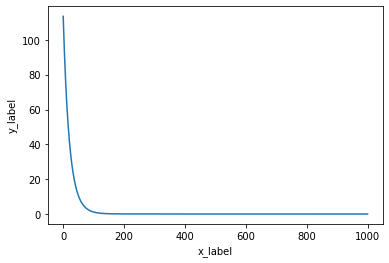

In [ ]:
def function_num1(x):
  result = 4+5*x+2*x**2
  return result

errors = []
mu = 0.0
sigma = 1.0
x = np.random.normal(mu, sigma, size=10)
y = function_num1(x)

iteration = 1000
learning_rate = 0.001
w1 = np.random.normal(mu, sigma, size=1)
w2 = np.random.normal(mu, sigma, size=1)
w3 = np.random.normal(mu, sigma, size=1)
b = np.random.normal(mu, sigma, size=1)  

for i in range(iteration):    
  y_pred = w1 * 4 + w2 * 5*x + w3 * 2*x**2 + b
  error = ((y_pred - y)**2).mean()
  errors.append(error)    
  w1 = w1 - learning_rate * ((y_pred - y) * 4).mean()
  w2 = w2 - learning_rate * ((y_pred - y) * 5*x).mean()
  w3 = w3 - learning_rate * ((y_pred - y) * 2*x**2).mean()
  b = b - learning_rate * (y_pred - y).mean()
   
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.plot(errors)
plt.show()

3. 다음의 함수를 Regression하는 Neural Network 모델을 만들어서 학습시키시오. Tranining step이 늘어남에 따라 Loss 함수가 줄어드는 그래프도 그리시오
    
    y = 2*sin(x)+3*cos(x)

**Line 1:** Sin(), Cos() 함수를 사용하기 위한 math package import

**Line 3-5:** 수식을 함수화 하여서 사용하기 위한 함수 선언

**Line 7-11:** 학습에서 사용할 변수 및 X, Y값 선언

**Line 13-17:** 학습에서 사용할 학습 횟수, 학습율, 가중치 변수, 편차 값 선언

**Line 19-27:** Neural Network를 Feedforward를 통해 예측하고 예측된 값과 실제 값을 비교하여서 오차된 부분만큼 가중치와 편차 값을 조정한다.

**Line 29-32:** 학습 횟수에 따른 error를 보여주기 위한 그래프를 그려준다.


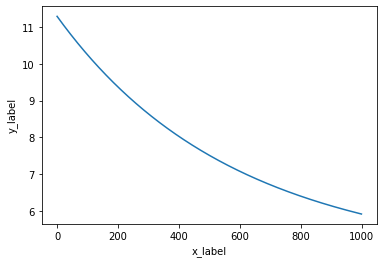

In [ ]:
import math

def function_num2(x):
  result = 2*math.sin(x)+3*math.cos(x)
  return result

errors = []
mu = 0.0
sigma = 1.0
x = list(range(1, 181, 1))
y = list([function_num2(i) for i in x])

iteration = 1000
learning_rate = 0.001
w1 = np.random.normal(mu, sigma, size=1)
w2 = np.random.normal(mu, sigma, size=1)
b = np.random.normal(mu, sigma, size=1)  

for i in range(iteration):
  y_pred = []
  for j in x:
    y_pred = np.append(y_pred, w1 * 2*math.sin(j) + w2 * 3*math.cos(j) + b)
  error = ((y_pred - y)**2).mean()
  errors.append(error)
  w1 = w1 - learning_rate * ((y_pred - y) * 2*math.sin(j)).mean()
  w2 = w2 - learning_rate * ((y_pred - y) * 3*math.cos(j)).mean()  
  b = b - learning_rate * (y_pred - y).mean()
   
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.plot(errors)
plt.show()